# DataCamp - Image Processing in Python

In [ ]:
# Tags
image processing

# References
[image-processing-in-python](https://app.datacamp.com/learn/courses/image-processing-in-python)

In [1]:
import os
import timeit

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from skimage import data

In [3]:

def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

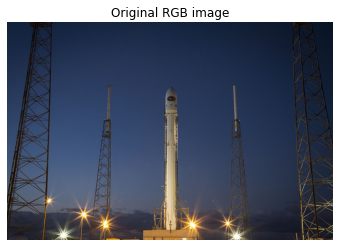

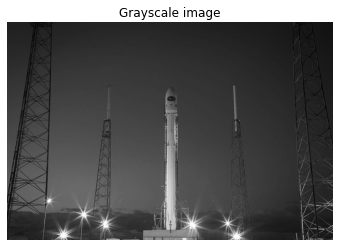

In [4]:
# Quick check with image load
# Import the modules from skimage
from skimage import data, color

# Load the rocket image
rocket = data.rocket()

# Convert the image to grayscale
gray_scaled_rocket = color.rgb2gray(rocket)

# Show the original image
show_image(rocket, 'Original RGB image')

# Show the grayscale image
show_image(gray_scaled_rocket, 'Grayscale image')

In [5]:
# Quick check with image load
import os
print("1. Define path")

# path = 'e:\PycharmProjects\CompleteEDA'
path = os.path.abspath(os.getcwd())


1. Define path


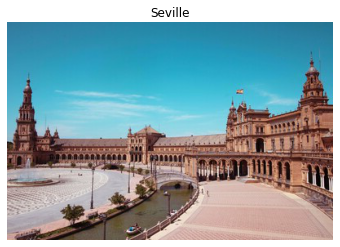

In [7]:
# Load the image
path_to_seville = os.path.join(path, 'img/chapter1', 'sevilleup(2).jpg')
flipped_seville = plt.imread(path_to_seville)

# Flip the image vertically
seville_vertical_flip = np.flipud(flipped_seville)

# Flip the image horizontally
seville_horizontal_flip = np.fliplr(seville_vertical_flip)

# Show the resulting image
show_image(seville_horizontal_flip, 'Seville')

Histograms

Analyze the amount of red in the image. To do this, the histogram of the red channel will be computed for the image shown below:

Extracting information from images is a fundamental part of image enhancement. This way you can balance the red and blue to make the image look colder or warmer.

You will use hist() to display the 256 different intensities of the red color. And ravel() to make these color values an array of one flat dimension.

Matplotlib is preloaded as plt and Numpy as np.

Remember that if we want to obtain the green color of an image we would do the following:

green = image[:, :, 1]


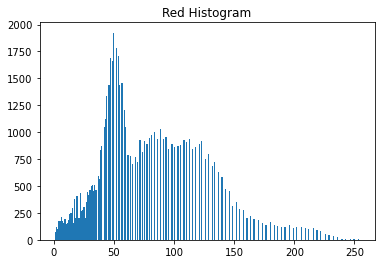

With this histogram we see that the image is quite reddish, meaning it has a sensation of warmness. This is because it has a wide and large distribution of bright red pixels, from 0 to around 150.


In [8]:
# Load the image
path_to_image = os.path.join(path, 'img/chapter1', '4.1.01.tiff')
#path_to_image = os.path.join(path, 'img', 'shirt.jpg')
image = plt.imread(path_to_image)

# Obtain the red channel
red_channel = image[:, :, 0]

# Plot the red histogram with bins in a range of 256
plt.hist(red_channel.ravel(), bins=256)

# Set title and show
plt.title('Red Histogram')
plt.show()

print('With this histogram we see that the image is quite reddish, meaning it has a sensation of warmness. This is because it has a wide and large distribution of bright red pixels, from 0 to around 150.')

# Apply global thresholding

Transform a photograph to binary so you can separate the foreground from the background.
To do so, you need to import the required modules, load the image, obtain the optimal thresh value using threshold_otsu() and apply it to the image.
You'll see the resulting binarized image when using the show_image() function.

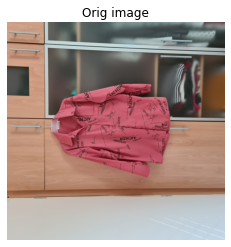

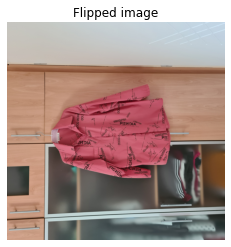

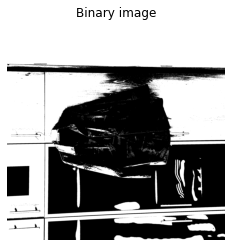

Converted the image to binary and we can separate the foreground from the background.


In [9]:
# Import the otsu threshold function
from skimage import data, color
from skimage.filters import threshold_otsu

# Load the image
path_to_image = os.path.join(path, 'img', 'shirt.jpg')
image = plt.imread(path_to_image)

# Show the initial image
show_image(image, 'Orig image')

# Flip the image vertically
image_flip = np.flipud(image)

# Show the flipped image
show_image(image_flip, 'Flipped image')

# Make the image grayscale using rgb2gray
image_gray = color.rgb2gray(image_flip)

# Obtain the optimal threshold value with otsu
thresh = threshold_otsu(image_gray)

# Apply thresholding to the image
binary = image_gray > thresh

# Show the image
show_image(binary, 'Binary image')

print('Converted the image to binary and we can separate the foreground from the background.')

When the background isn't that obvious
Sometimes, it isn't that obvious to identify the background. If the image background is relatively uniform, then you can use a global threshold value as we practiced before, using threshold_otsu(). However, if there's uneven background illumination, adaptive thresholding threshold_local() (a.k.a. local thresholding) may produce better results. 

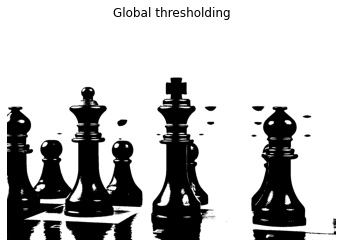

In [10]:
# Import the otsu threshold function
from skimage import data, color
from skimage.filters import threshold_otsu

# Load the image
path_to_image = os.path.join(path, 'img/chapter1', 'bw.jpg')
chess_pieces_image = plt.imread(path_to_image)

# Make the image grayscale using rgb2gray
chess_pieces_image_gray = color.rgb2gray(chess_pieces_image)

# Obtain the optimal otsu global thresh value
global_thresh = threshold_otsu(chess_pieces_image_gray)

# Obtain the binary image by applying global thresholding
binary_global = chess_pieces_image_gray > global_thresh

# Show the binary image obtained
show_image(binary_global, 'Global thresholding')

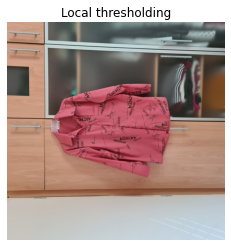

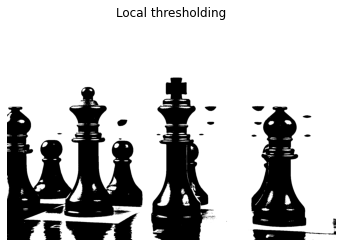

In [11]:
# Import the local threshold function
from skimage.filters import threshold_local
from skimage import data, color

# Load the image
#path_to_image = os.path.join(path, 'img/chapter1', 'bw.jpg')
path_to_image = os.path.join(path, 'img', 'shirt.jpg')
chess_pieces_image = plt.imread(path_to_image)

# Show the binary image obtained
show_image(chess_pieces_image, 'Local thresholding')

# Make the image grayscale using rgb2gray
chess_pieces_image_gray = color.rgb2gray(chess_pieces_image)

# Set the block size to 35
block_size = 35

# Obtain the optimal local thresholding
local_thresh = threshold_local(chess_pieces_image_gray, 35, offset=10)

# Obtain the binary image by applying local thresholding
binary_local = chess_pieces_image_gray > local_thresh

# Show the binary image obtained
show_image(binary_global, 'Local thresholding')


Trying other methods

As we saw in the video, not being sure about what thresholding method to use isn't a problem. In fact, scikit-image provides us with a function to check multiple methods and see for ourselves what the best option is. It returns a figure comparing the outputs of different global thresholding methods.

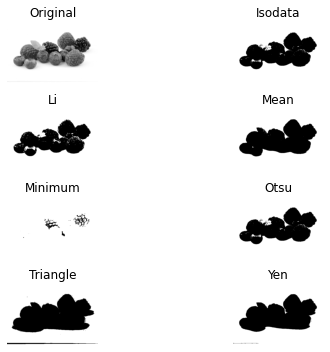

This image works good with some global thresholding methods (like the "Yen" and "Mean") and not so well in others, (like the "Minimum").


In [12]:
# Import the try all function
from skimage.filters import try_all_threshold

# Import the rgb to gray convertor function 
from skimage.color import rgb2gray

# Load the image
path_to_image = os.path.join(path, 'img/chapter1', 'fruits-2.jpg')
fruits_image = plt.imread(path_to_image)

# Turn the fruits_image to grayscale
grayscale = rgb2gray(fruits_image)

# Use the try all method on the resulting grayscale image
fig, ax = try_all_threshold(grayscale, verbose=False)

# Show the resulting plots
plt.show()

print('This image works good with some global thresholding methods (like the "Yen" and "Mean") and not so well in others, (like the "Minimum").')

Apply thresholding

In this exercise, you will decide what type of thresholding is best used to binarize an image of knitting and craft tools. In doing so, you will be able to see the shapes of the objects, from paper hearts to scissors more clearly.
What type of thresholding would you use judging by the characteristics of the image? Is the background illumination and intensity even or uneven?

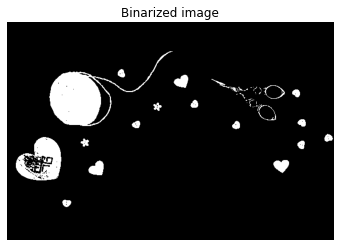

By using a global thresholding method, you obtained the precise binarized image. 
         If you would have used local instead nothing would have been segmented.Try it yourself and see it! In the next chapters, 
         we'll get into image restoration, face detection, and much more. Stay tuned!


In [13]:
# Import threshold and gray convertor functions
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray

# Load the image
path_to_image = os.path.join(path, 'img/chapter1', 'shapes52.jpg')
tools_image = plt.imread(path_to_image)

# Turn the image grayscale
gray_tools_image = rgb2gray(tools_image)

# Obtain the optimal thresh
thresh = threshold_otsu(gray_tools_image)

# Obtain the binary image by applying thresholding
binary_image = gray_tools_image > thresh

# Show the resulting binary image
show_image(binary_image, 'Binarized image')

print('''By using a global thresholding method, you obtained the precise binarized image. 
         If you would have used local instead nothing would have been segmented.Try it yourself and see it! In the next chapters, 
         we'll get into image restoration, face detection, and much more. Stay tuned!''')

# Filtering EDGE DETECTION

In [14]:
def plot_comparison(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True,
    sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')

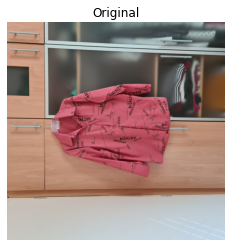

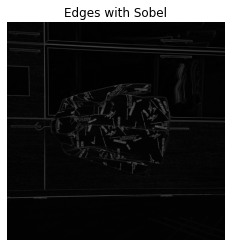

Detected the edges in the image.
As you can see, the edges of all the figures in the scene are highlighted.


In [15]:
# Import the color module
from skimage import color

# Import the filters module and sobel function
from skimage.filters import sobel

# Load the image
path_to_image = os.path.join(path, 'img/chapter2', 'soap_image.jpg')
path_to_image = os.path.join(path, 'img', 'shirt.jpg')
soaps_image = plt.imread(path_to_image)


# Make the image grayscale
soaps_image_gray = color.rgb2gray(soaps_image)

# Apply edge detection filter
edge_sobel = sobel(soaps_image_gray)

# Show original and resulting image to compare
show_image(soaps_image, "Original")
show_image(edge_sobel, "Edges with Sobel")

print('''Detected the edges in the image.
As you can see, the edges of all the figures in the scene are highlighted.''')

Blurring to reduce noise

In this exercise you will reduce the sharpness of an image of a building taken during a London trip, through filtering.

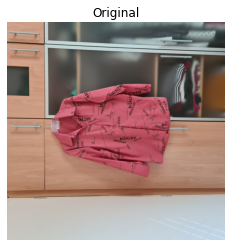

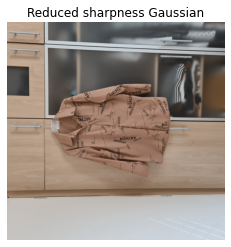

removed the excessive sharpness in the image.


In [16]:
# Import Gaussian filter 
from skimage.filters import gaussian

# Load the image
path_to_image = os.path.join(path, 'img/chapter2', 'building_image.jpg')
path_to_image = os.path.join(path, 'img', 'shirt.jpg')
building_image = plt.imread(path_to_image)

# Apply filter
gaussian_image = gaussian(building_image, channel_axis=True)

# Show original and resulting image to compare
show_image(building_image, "Original")
show_image(gaussian_image, "Reduced sharpness Gaussian")

print('removed the excessive sharpness in the image.')

In [ ]:
# Contrast enhancement 

What's the contrast of this image?

The histogram tell us.
Just as we saw previously, you can calculate the contrast by calculating the range of the pixel intensities i.e. by subtracting the minimum pixel intensity value from the histogram to the maximum one.
You can obtain the maximum pixel intensity of the image by using the np.max() method from NumPy and the minimum with np.min() in the console.
The image has already been loaded as clock_image, NumPy as np and the show_image() function.

Medical images
You are trying to improve the tools of a hospital by pre-processing the X-ray images so that doctors have a higher chance of spotting relevant details. You'll test our code on a chest X-ray image from the National Institutes of Health Chest X-Ray Dataset

In [ ]:
# Import Gaussian filter 
from skimage.filters import gaussian

# Load the image
path_to_image = os.path.join(path, 'img/chapter2', 'chest_xray_image.png')
path_to_image = os.path.join(path, 'img', 'shirt.jpg')
building_image = plt.imread(path_to_image)